In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm

from BondingCurveNexus import single_sim
from BondingCurveNexus.sys_class import NexusSystem
from BondingCurveNexus.param_functions import open_liq, wnxm_movement_per_eth

100%|███████████████████████████████████████████████████████████████████████████████| 730/730 [00:00<00:00, 1880.88it/s]


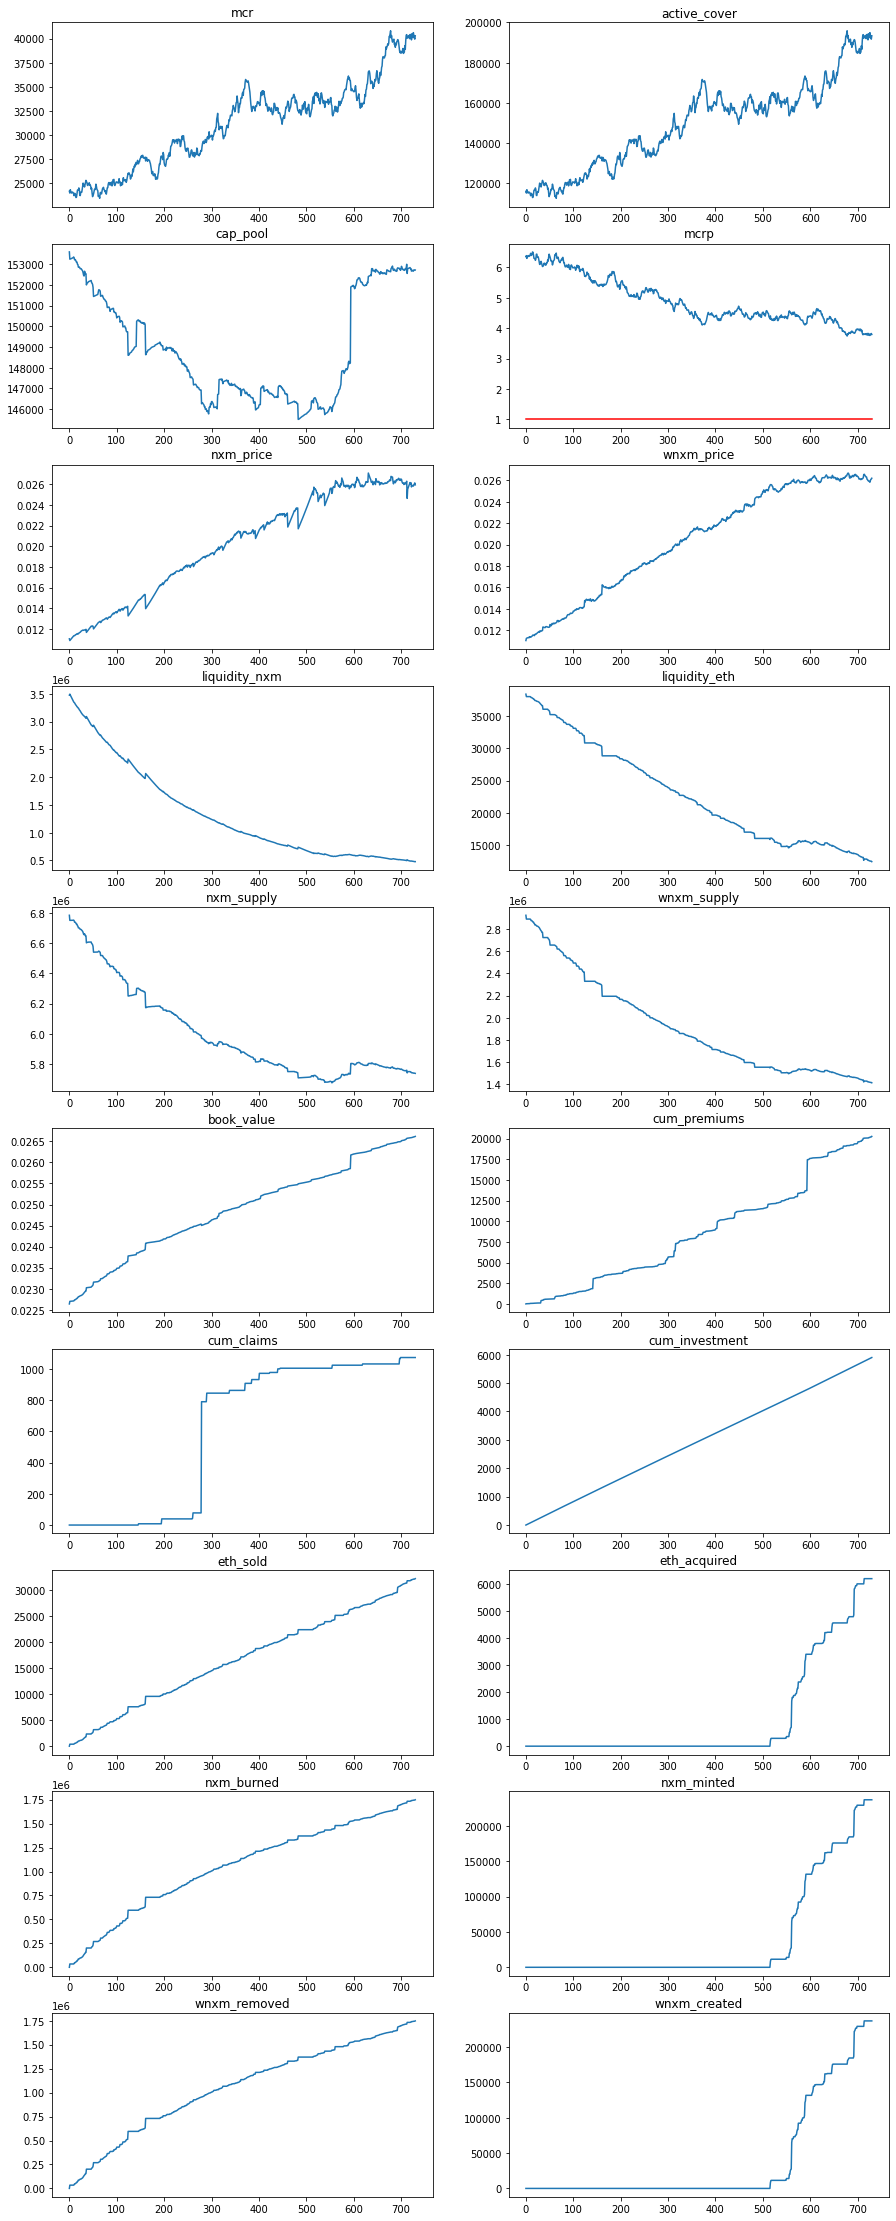

In [3]:
%run ../BondingCurveNexus/single_sim.py

In [4]:
num_sims = 10_000
sims = [NexusSystem(liquidity_eth=open_liq(0.5), wnxm_move_size=wnxm_movement_per_eth(two_perc_liq_usd=500_000))
        for x in range(num_sims)]

In [5]:
model_days = 730

for sim in tqdm(sims):
    for i in range(model_days):
        sim.cover_amount_shift()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2339.64it/s]


In [6]:
cover_range = [sim.act_cover for sim in sims]

In [8]:
pd.DataFrame(cover_range).describe()

,0
count,1.000000e+04
mean,3.508051e+13
std,2.232385e+15
min,6.451756e-09
25%,2.095518e+03
50%,2.985293e+05
75%,3.714823e+07
max,2.036814e+17
